In [39]:
import numpy as np
from numpy import sqrt,exp,cos,sin,pi
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import constants as c
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import integrate
from scipy import special

### 1. More practice using complex numbers in Python

In [14]:
def i_div(a,b,c,d):
    x = (a*c+b*d)/(c**2+d**2)
    y = (b*c-a*d)/(c**2+d**2)
    return complex(x,y)

In [15]:
z = (3+4j)/(5+6j)
expanded = i_div(3,4,5,6)
print(z, expanded)

(0.6393442622950819+0.03278688524590165j) (0.639344262295082+0.03278688524590164j)


In [20]:
#e^2i = cos(2) + isin(2) = -0.416+0.909i
#cos(3i) = (e^-3+e^3)/2 = 10.068

print(exp(2j), cos(3j))

(-0.4161468365471424+0.9092974268256817j) (10.067661995777767-0j)


### 2. Euler’s formula with complex arguments

In [26]:
def ifunc(t,z):
    return exp(1j*z*t)

#z = input('Input a complex number (a+bj): ')

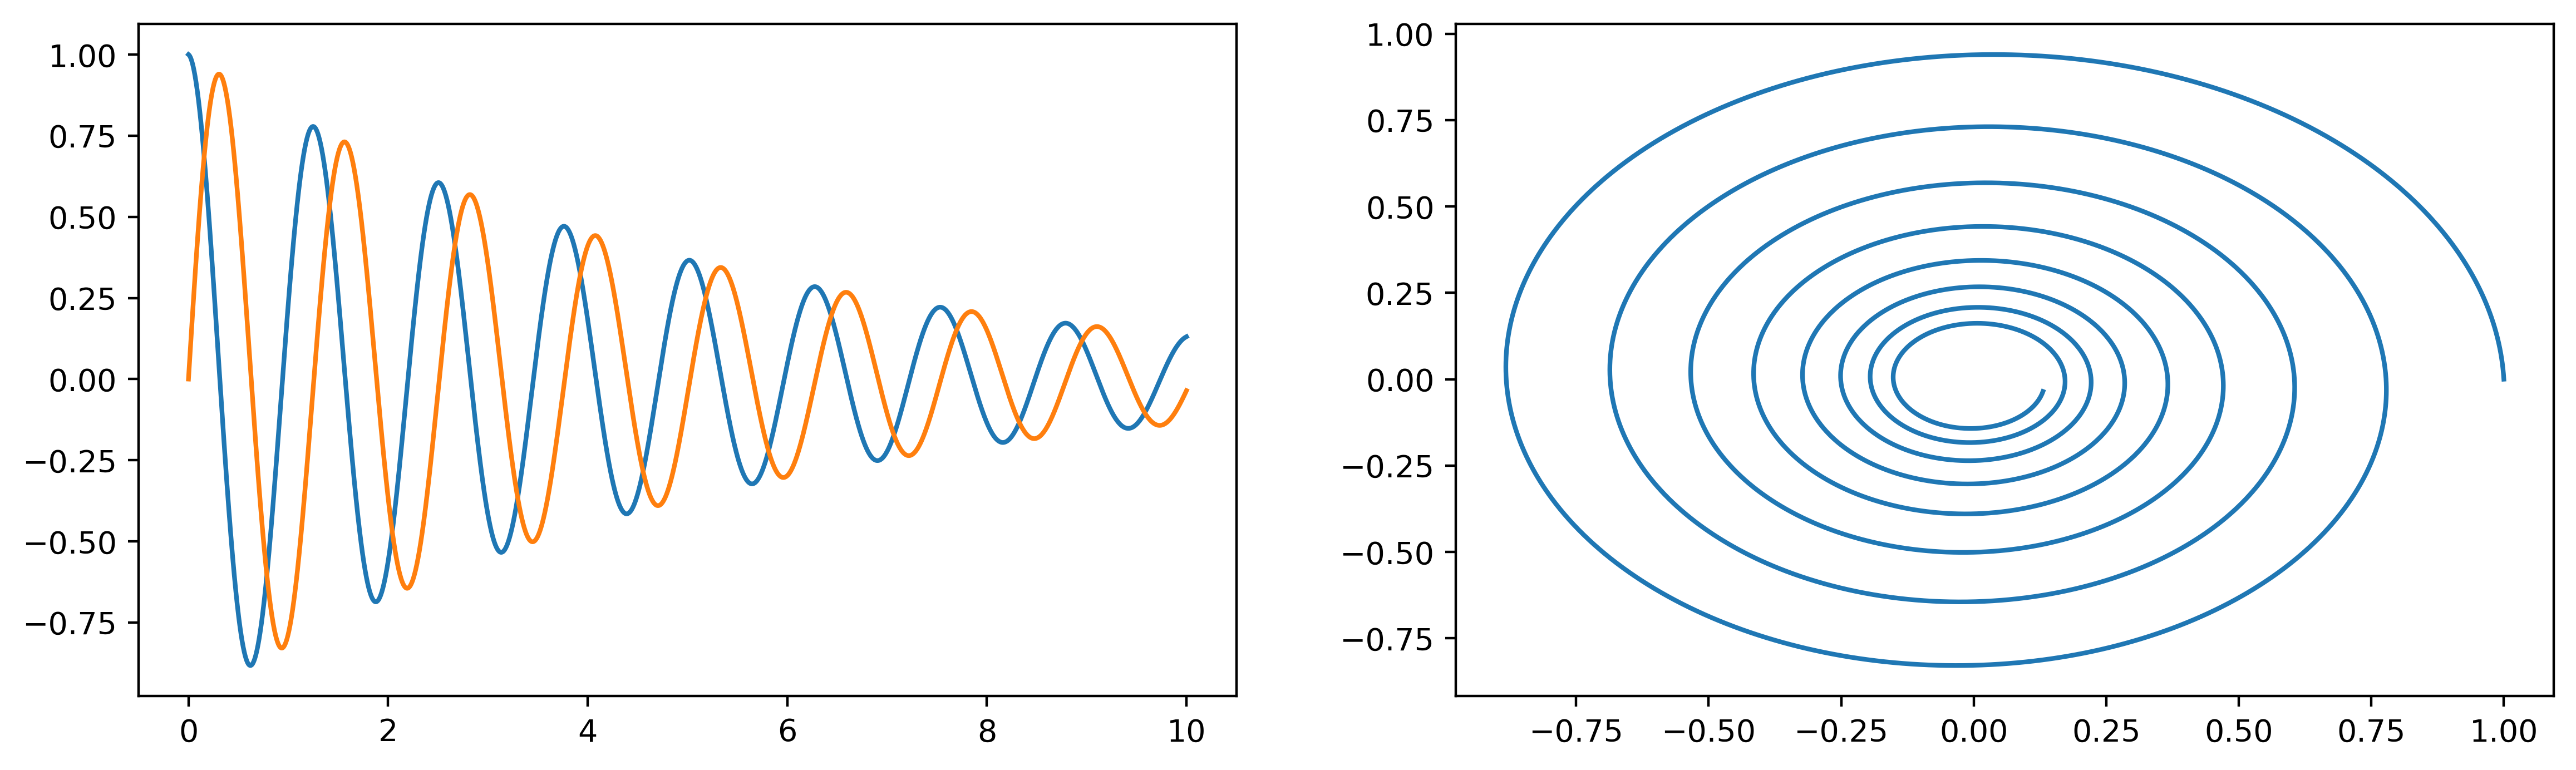

In [36]:
z = 5+0.2j
t = np.linspace(0,10,10000)

fig,ax = plt.subplots(1,2, figsize=(14,4), dpi=400)
ax[0].plot(t,ifunc(t,z).real)
ax[0].plot(t,ifunc(t,z).imag)
ax[1].plot(ifunc(t,z).real,ifunc(t,z).imag)
plt.show()

phase plot is circular because both real and imaginary parts are oscillating together, real and imaginary vs time oscillate because they are based in sine and cosine functions

### 3. Use complex numbers to analyze an AC circuit

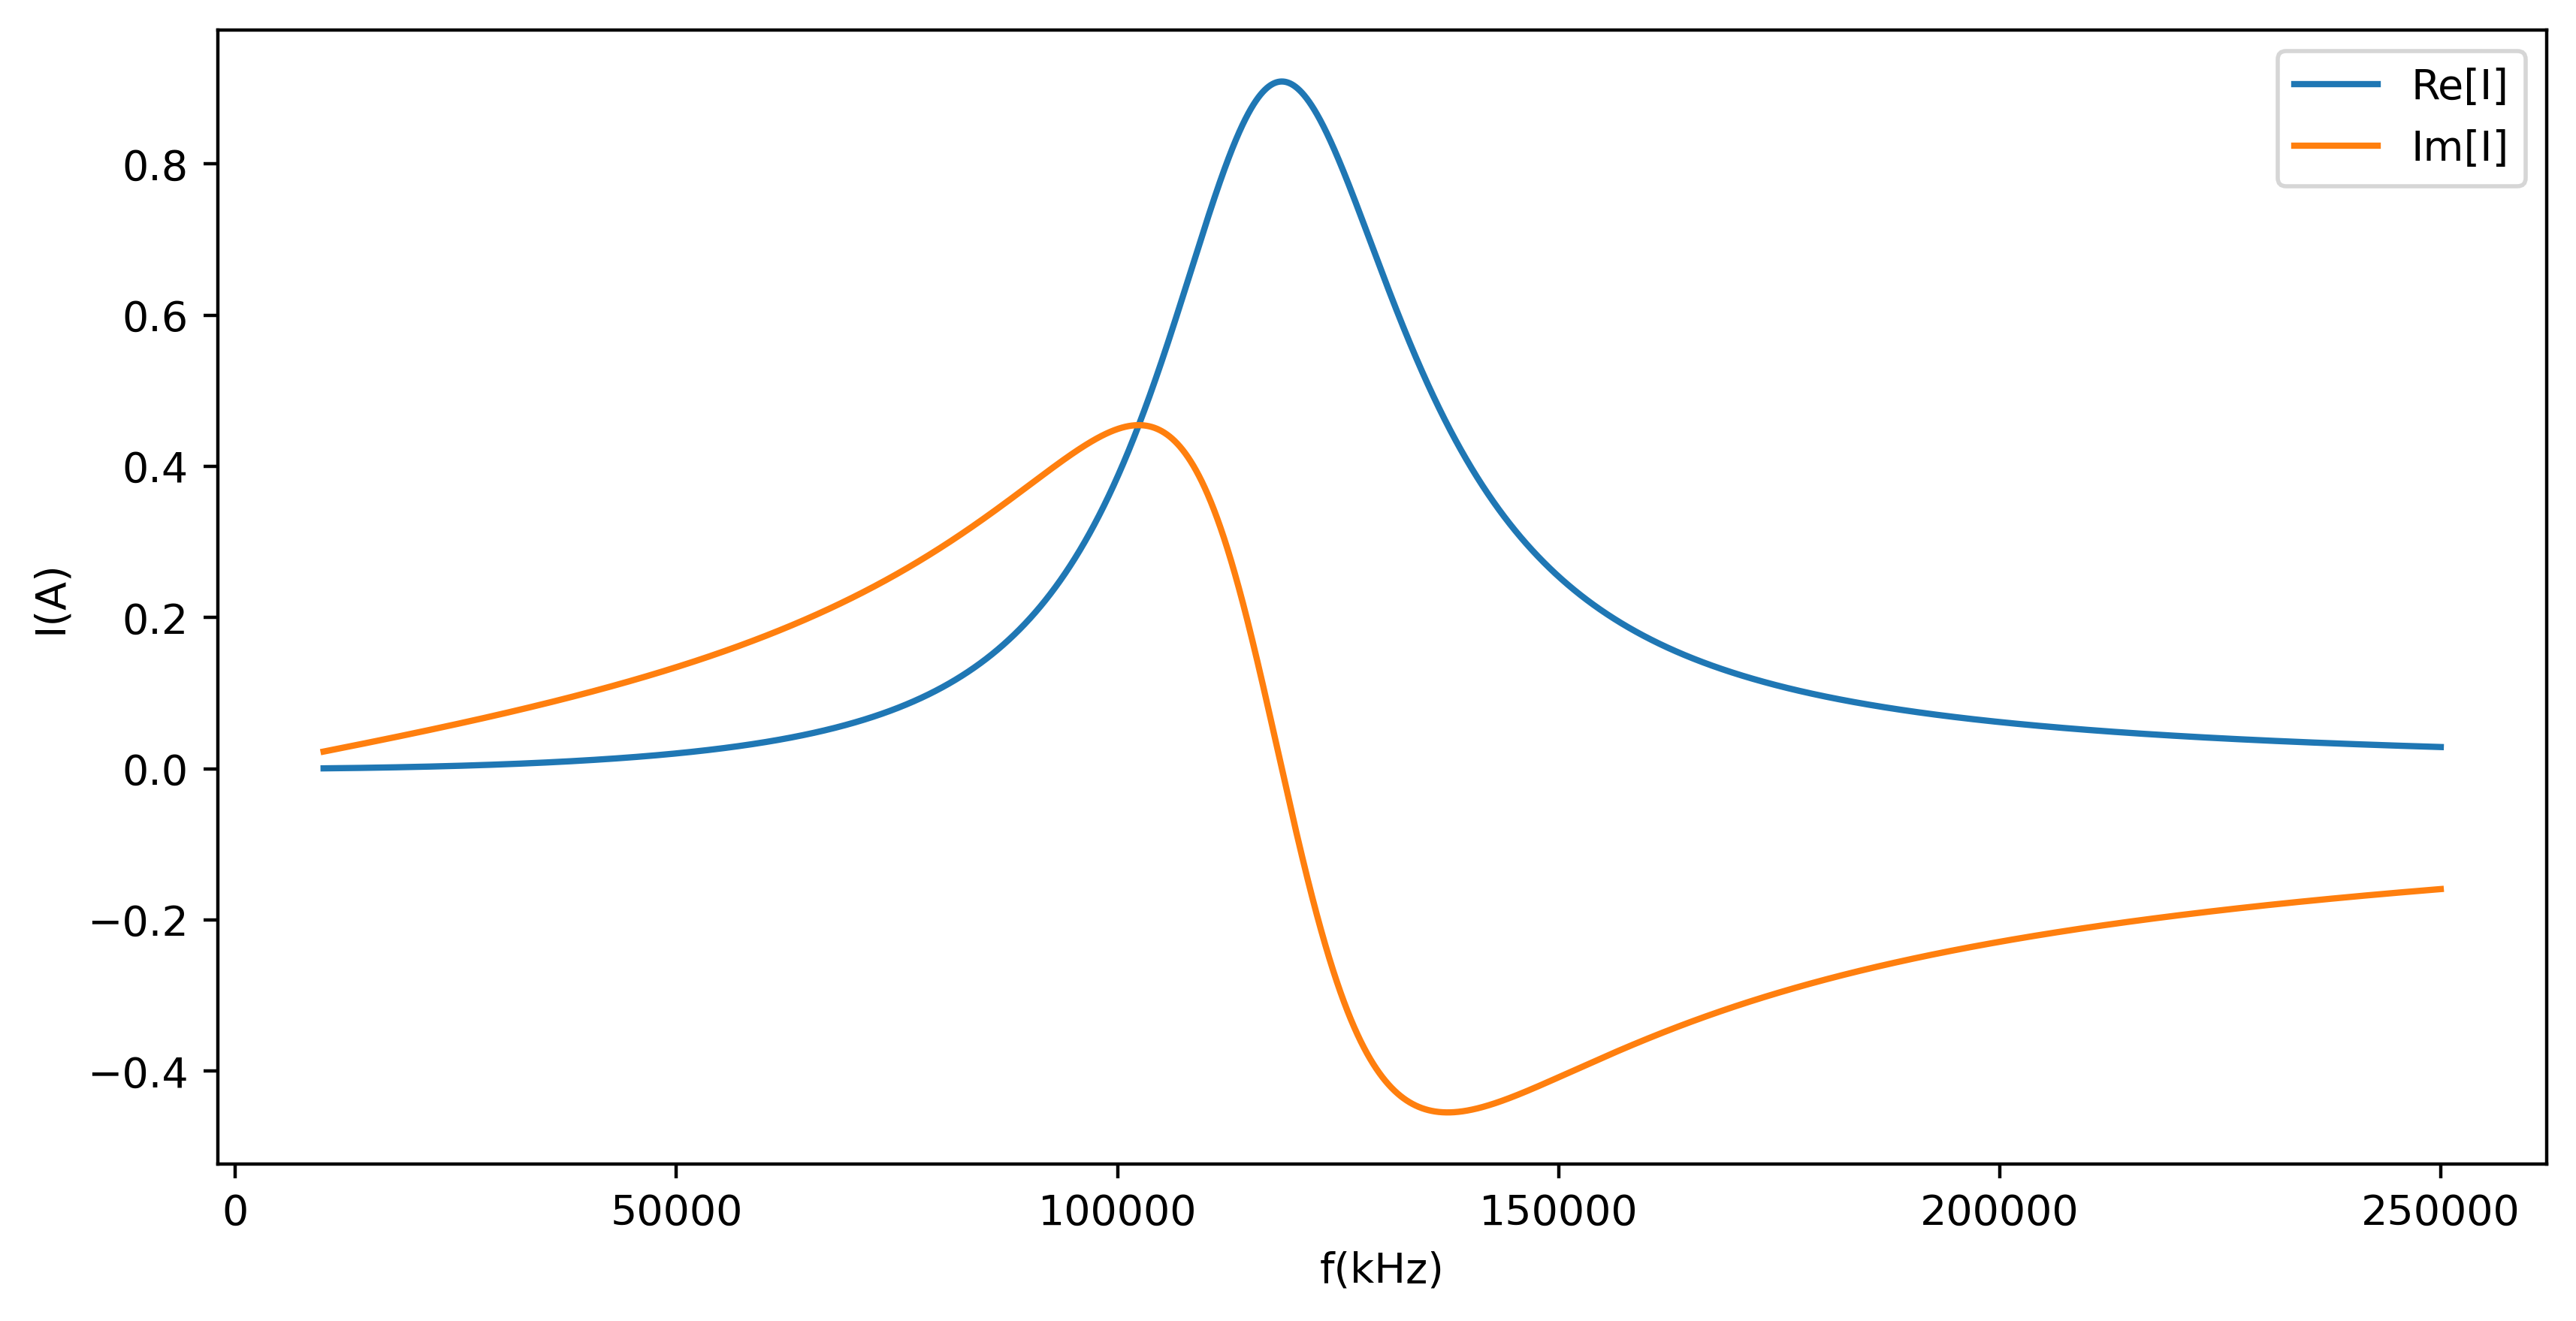

In [42]:
def I(f,L,C,R,V):
    Z_L = 1j*2*pi*f*L
    Z_C = 1/(1j*2*pi*f*C)
    Z_t = R+Z_L+Z_C
    I = V/Z_t
    return I

f = np.linspace(10000,250000,1000000)
L = 150e-6
C = 12e-9
R = 33
V = 30
plt.figure(figsize=(10,5),dpi=400)
plt.plot(f,I(f,L,C,R,V).real,label='Re[I]')
plt.plot(f,I(f,L,C,R,V).imag,label='Im[I]')
plt.xlabel('f(kHz)')
plt.ylabel('I(A)')
plt.legend()
plt.show()

### 4. Plotting the Mandelbrot Set

### 6. Numerical integration: Error functions

In [12]:
def e_func(t):
    return exp(-t**2)

uplim = np.arange(0,3,0.5)
y = []
yerr = []

for lim in uplim:
    out,outerr = integrate.quad(e_func, 0, lim)
    y.append(out)
    yerr.append(outerr)
    print(yerr[-1])

0.0
5.121247941417467e-15
8.291413475940725e-15
9.505600680191918e-15
9.793070696178202e-15
2.1108897914342584e-14


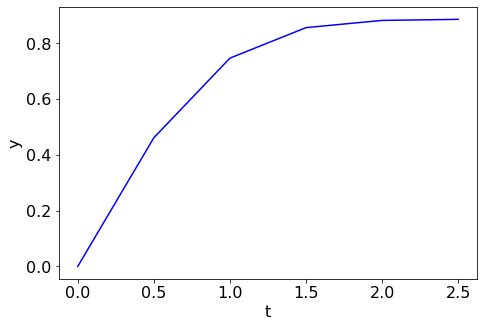

In [13]:
plt.figure(figsize=(7.5,5))
plt.rc('font', size=16) 
plt.errorbar(uplim,y,yerr,c='b')
plt.xlabel('t')
plt.ylabel('y') 
plt.show()

### 7. Numerical integration

In [46]:
def E(t):
    return sqrt(1-(0.9999*np.sin(t)**2))

print(special.ellipe(0.9999))

1.000274582430663


In [121]:
N = [10,100,1000]

for runs in N:
    x = np.linspace(0,np.pi/2,runs+1)
    trap = E(x[0])+E(x[-1])
    delta = x[1]-x[0]
    for k in x[:-1]:
        trap += 2*E(k)
    trap *= delta/2
    print(f'{runs} Runs: {trap}')

10 Runs: 1.155914115091597
100 Runs: 1.0159819176757545
1000 Runs: 1.001845378757456


In [122]:
N = [10,100,1000]
a = 0
b = np.pi/2

for runs in N:
    f_0N = E(a)+E(b)
    h = (b-a)/runs
    sum1 = 0
    sum2 = 0
    for j in range(int(runs/2)):
        sum1 += E(a+h*(2*j-1))
    for j in range(int(runs/2-1)):
        sum2 += E(a+h*(2*j))
    simp = ((b-a)/(3*runs))*(f_0N+4*sum1+2*sum2)
    print(f'{runs} Runs: {simp}')

10 Runs: 1.2470212149954523
100 Runs: 1.0309568191727143
1000 Runs: 1.0033839952262593


In [68]:
result,error = integrate.quad(E, 0, np.pi/2)
print(result)

1.0002745824307404


### 8. Heat capacity of a solid

In [107]:
def integrand(x):
    return x**4*(exp(x)/(exp(x)-1)**2)

def C_V(T):
    term1 = 5.42e26*(T/428)**3
    integral = integrate.quad(integrand, 0, 428/T)[0]
    return term1*integral

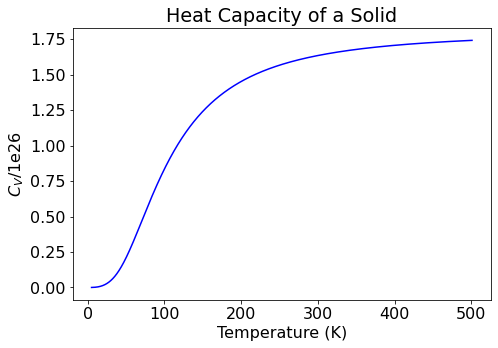

In [128]:
temp = np.linspace(5,501,10000)
heat_cap  = []

for t in temp:
    heat_cap.append(C_V(t))

plt.figure(figsize=(7.5,5))
plt.rc('font', size=16) 
plt.plot(temp,np.array(heat_cap)/1e26,c='b')
plt.xlabel('Temperature (K)')
plt.ylabel('$C_V$/1e26')
plt.title('Heat Capacity of a Solid')
plt.show()